In [ ]:
import re
from glob import glob
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Libraries
import pandas as pd # Dataframes
import numpy as np
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # Visualization
from sklearn.preprocessing import OneHotEncoder # Encoding with categorical data
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate
import missingno as msno # Visualizing null values
from sklearn.impute import KNNImputer # Filling in null values for numeric data
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import time
from sklearn.naive_bayes import GaussianNB

In [ ]:
path = glob('/content/drive/MyDrive/Loan*')
df = pd.read_csv(path[0])

In [ ]:
path

['/content/drive/MyDrive/Loan_Default.csv']

In [ ]:
df.shape

(148670, 34)

In [ ]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [ ]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [ ]:
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [ ]:
df.nunique()

ID                           148670
year                              1
loan_limit                        2
Gender                            4
approv_in_adv                     2
loan_type                         3
loan_purpose                      4
Credit_Worthiness                 2
open_credit                       2
business_or_commercial            2
loan_amount                     211
rate_of_interest                131
Interest_rate_spread          22516
Upfront_charges               58271
term                             26
Neg_ammortization                 2
interest_only                     2
lump_sum_payment                  2
property_value                  385
construction_type                 2
occupancy_type                    3
Secured_by                        2
total_units                       4
income                         1001
credit_type                       4
Credit_Score                    401
co-applicant_credit_type          2
age                         

In [ ]:
# Drop year since all entries are 2019
df.drop(columns=['year'], inplace=True)

In [ ]:
# Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   loan_limit                 145326 non-null  object 
 2   Gender                     148670 non-null  object 
 3   approv_in_adv              147762 non-null  object 
 4   loan_type                  148670 non-null  object 
 5   loan_purpose               148536 non-null  object 
 6   Credit_Worthiness          148670 non-null  object 
 7   open_credit                148670 non-null  object 
 8   business_or_commercial     148670 non-null  object 
 9   loan_amount                148670 non-null  int64  
 10  rate_of_interest           112231 non-null  float64
 11  Interest_rate_spread       112031 non-null  float64
 12  Upfront_charges            109028 non-null  float64
 13  term                       14

In [ ]:
## pre-processing the data (missing data/duplicate/outliers)

# confirm that there is no duplicated variable in this df
duplicate_rows = df.duplicated().sum()
duplicate_rows

0

In [ ]:
# check missing data
missing_col = df.isna().sum()

# Display columns with missing values and the number of missing values for each column
missing_col[missing_col > 0]

loan_limit                    3344
approv_in_adv                  908
loan_purpose                   134
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
property_value               15098
income                        9150
age                            200
submission_of_application      200
LTV                          15098
dtir1                        24121
dtype: int64

In [ ]:
# check how many rows contain missing data
missing_row = df.isna().any(axis=1).sum()
missing_row

50483

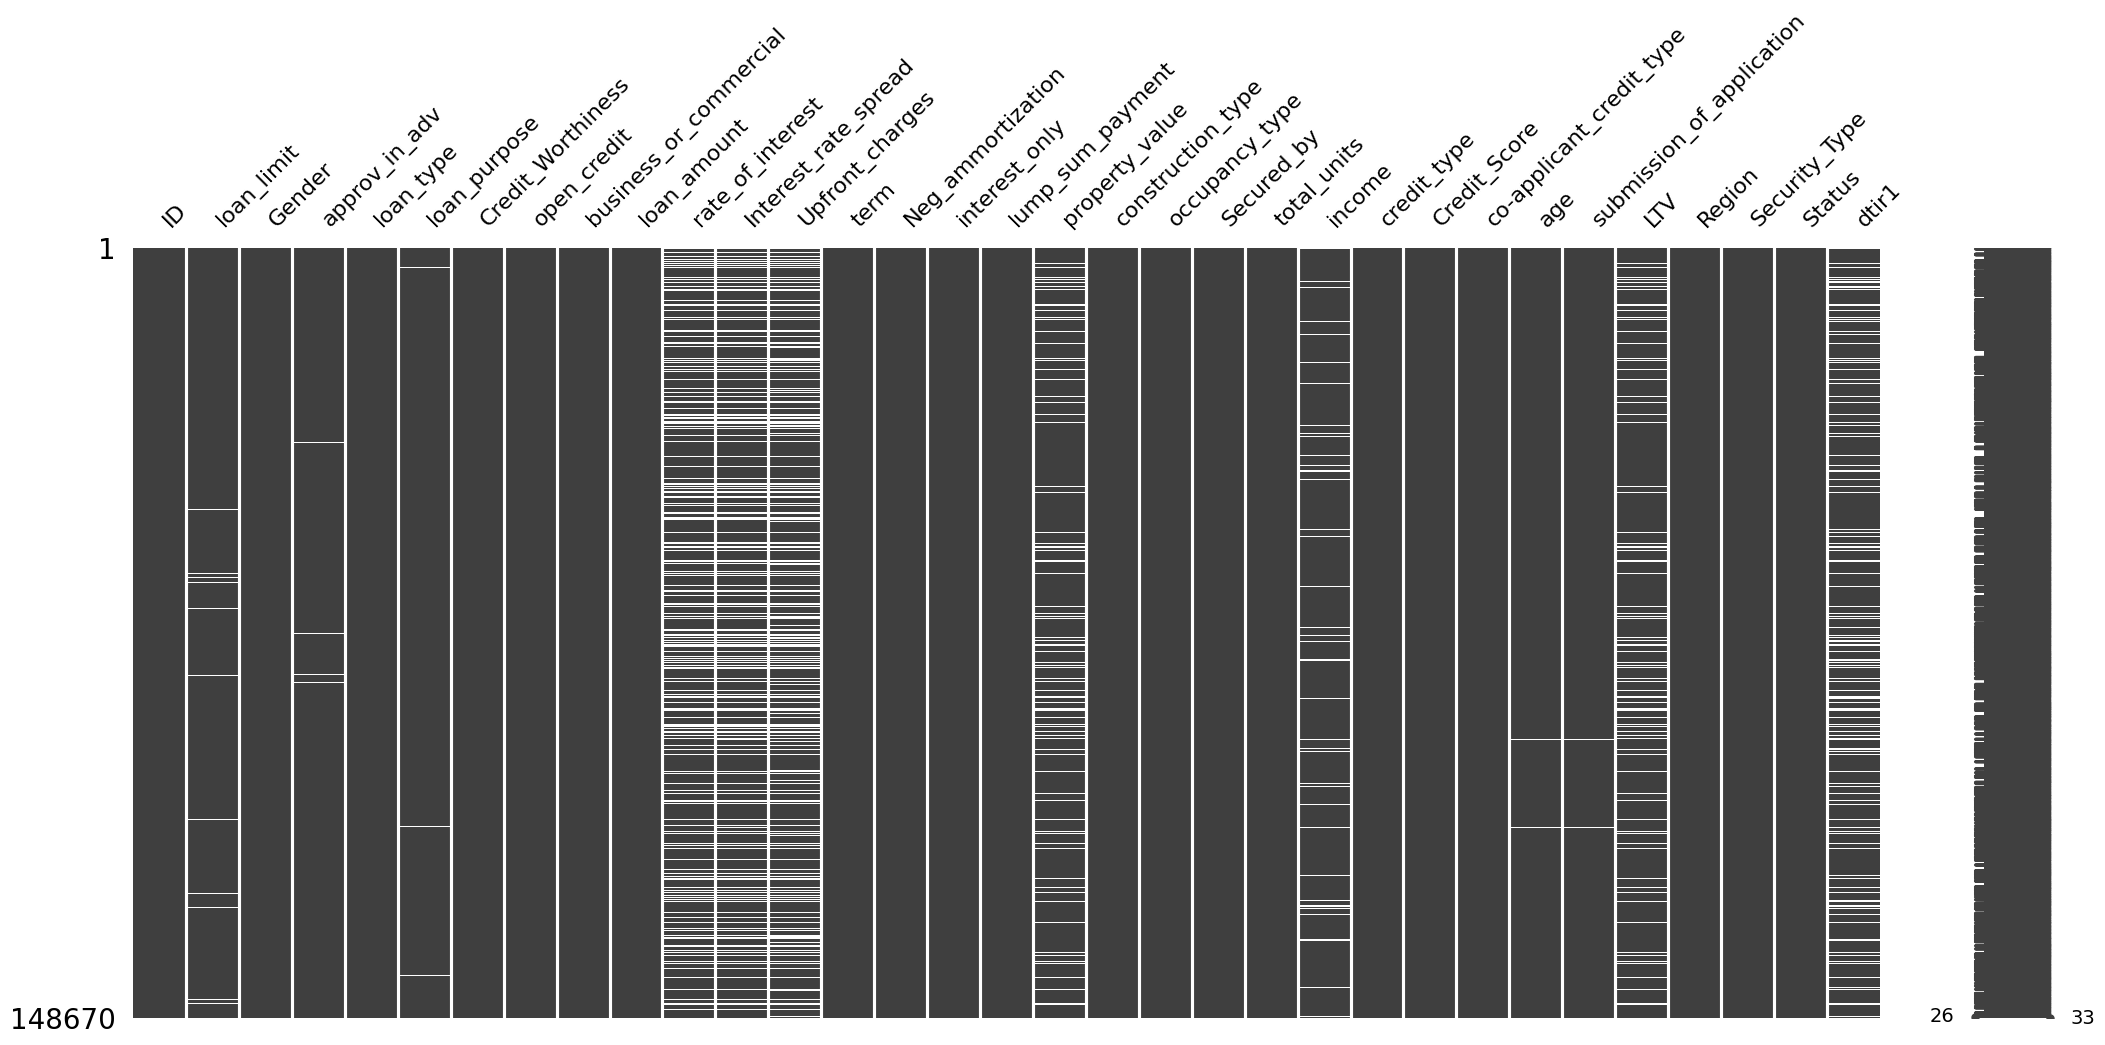

<Figure size 1500x900 with 0 Axes>

In [ ]:
# Visualizing Null values (image)
msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()

In [ ]:
## MICE Imputation
# separate the dataset into numeric and categorical features for different imputation strategies
numeric_df = df.select_dtypes(include=['int64', 'float64'])
categorical_df = df.select_dtypes(include=['object'])

# Imputing numerical features using MICE
mice_imputer = IterativeImputer(max_iter=10, random_state=0)
numeric_df_imputed = mice_imputer.fit_transform(numeric_df)
numeric_df_imputed = pd.DataFrame(numeric_df_imputed, columns=numeric_df.columns)

# Preparing categorical data for MICE by converting categories to numerical codes
encoder = OrdinalEncoder()
categorical_df_encoded = encoder.fit_transform(categorical_df)
categorical_df_encoded = pd.DataFrame(categorical_df_encoded, columns=categorical_df.columns)

# Imputing the encoded categorical features using MICE
categorical_df_imputed = mice_imputer.fit_transform(categorical_df_encoded)
categorical_df_imputed = pd.DataFrame(categorical_df_imputed, columns=categorical_df.columns)

# Converting numerical codes back to categories
categorical_df_imputed = encoder.inverse_transform(categorical_df_imputed)
categorical_df_imputed = pd.DataFrame(categorical_df_imputed, columns=categorical_df.columns)

# Combining the imputed numerical and categorical data back into a single DataFrame
imputed_df = pd.concat([numeric_df_imputed, categorical_df_imputed], axis=1)

In [ ]:

# Check the data after imputation
imputed_df.isna().sum().sum()

0

In [ ]:
df_temp = imputed_df.copy()
df_temp['term'] = df_temp['term'].astype(str)
df_temp['Status'] = df_temp['Status'].astype(str)

In [ ]:
# Function to remove outliers for numerical columns in a DataFrame
def remove_outliers(df, threshold=3):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Removing outliers from the combined dataframe
df_no_outliers = remove_outliers(df_temp)

In [ ]:
df_no_outliers.shape, imputed_df.shape

((142767, 33), (148670, 33))

In [ ]:
(148670-142767)/148670

0.039705387771574625

In [ ]:
term_vals = pd.DataFrame(df_no_outliers['term'].value_counts().reset_index())

# Drop terms that have less than 10 appearences in dataset
terms_to_drop = []
for i, l in zip(term_vals['index'], term_vals['term']):
    if l < 10:
        terms_to_drop.append(i)

for i in terms_to_drop:
    df_no_outliers = df_no_outliers[df_no_outliers['term'] != i]

In [ ]:
# Remaining Data
proportion_remaining = round(len(df_no_outliers) / len(imputed_df), 5)
proportion_dropped = round(1 - proportion_remaining, 2) * 100
dropped = len(imputed_df) - len(df_no_outliers)
print("We dropped ", dropped, ' rows from the dataset')
print("That is about", proportion_dropped, "% of the original dataset" )
print("The proportion of the original dataset remaining is:  ", proportion_remaining)
print("The remaining data contains {} missing values.".format(imputed_df.isna().sum().sum()))

We dropped  5952  rows from the dataset
That is about 4.0 % of the original dataset
The proportion of the original dataset remaining is:   0.95997
The remaining data contains 0 missing values.


In [ ]:
df_no_outliers['term'] = df_no_outliers['term'].astype('float')
df_no_outliers1 = df_no_outliers.copy()

In [ ]:
# the data is clean now and then we can start performing EDA

In [ ]:
######### EDA for numeric data

numeric_df.columns

Index(['ID', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',
       'LTV', 'Status', 'dtir1'],
      dtype='object')

In [ ]:
df_no_outliers.columns

Index(['ID', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',
       'LTV', 'Status', 'dtir1', 'loan_limit', 'Gender', 'approv_in_adv',
       'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'Neg_ammortization', 'interest_only',
       'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by',
       'total_units', 'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region', 'Security_Type'],
      dtype='object')

In [ ]:
df_hist = df_no_outliers1.drop(columns=['ID','term','Credit_Score'], inplace=True)

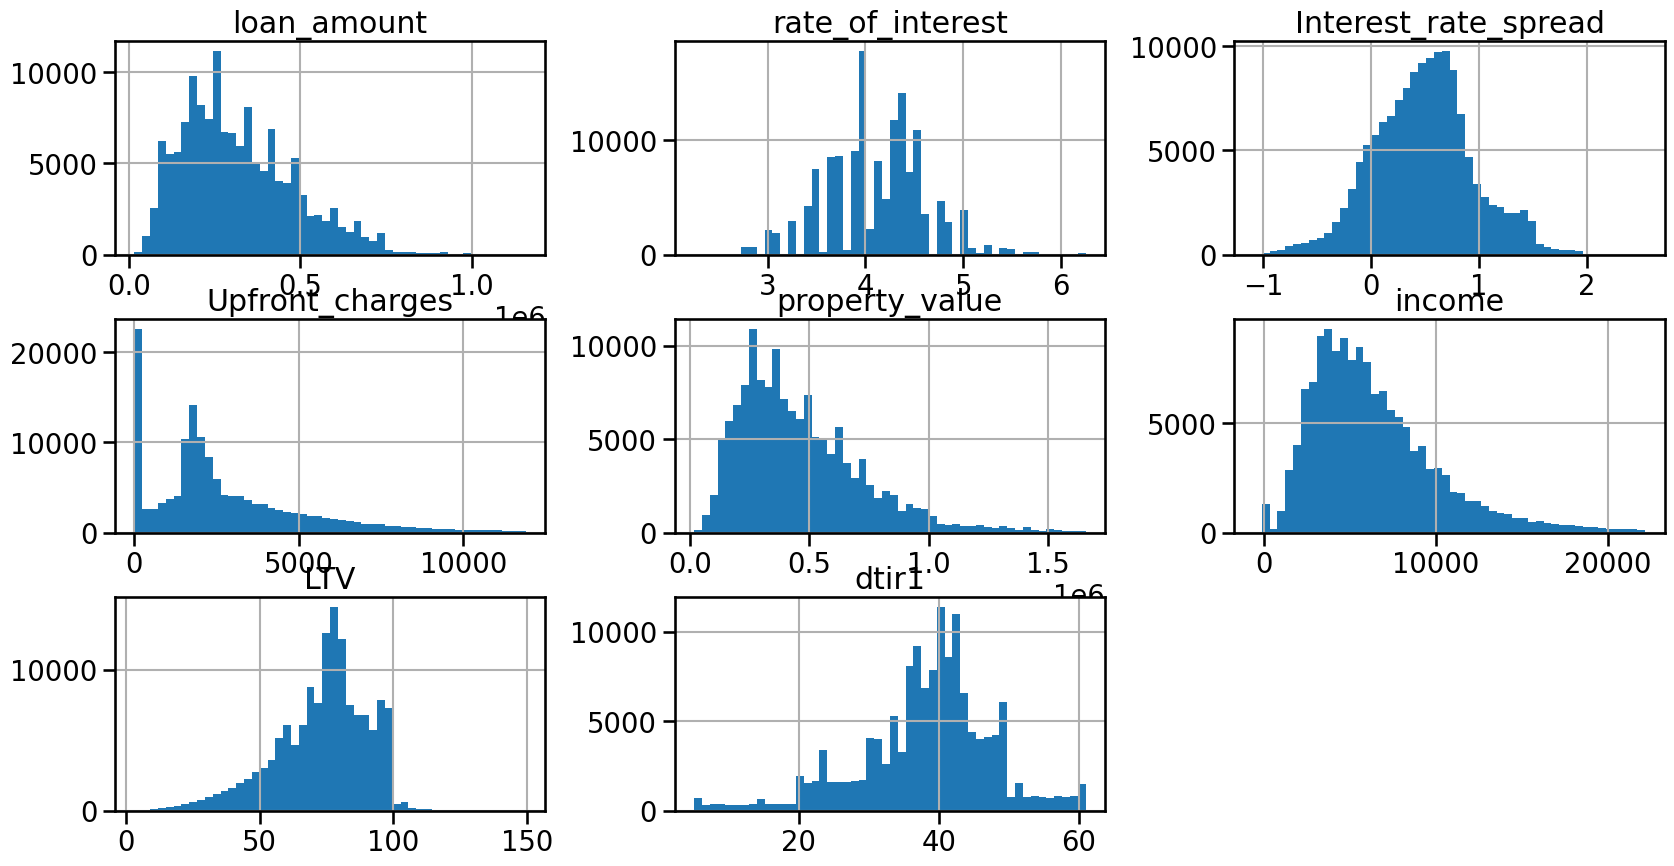

In [ ]:
# histograms of numerical variables
df_no_outliers1.hist(bins = 50, figsize = (20, 10))
plt.show()

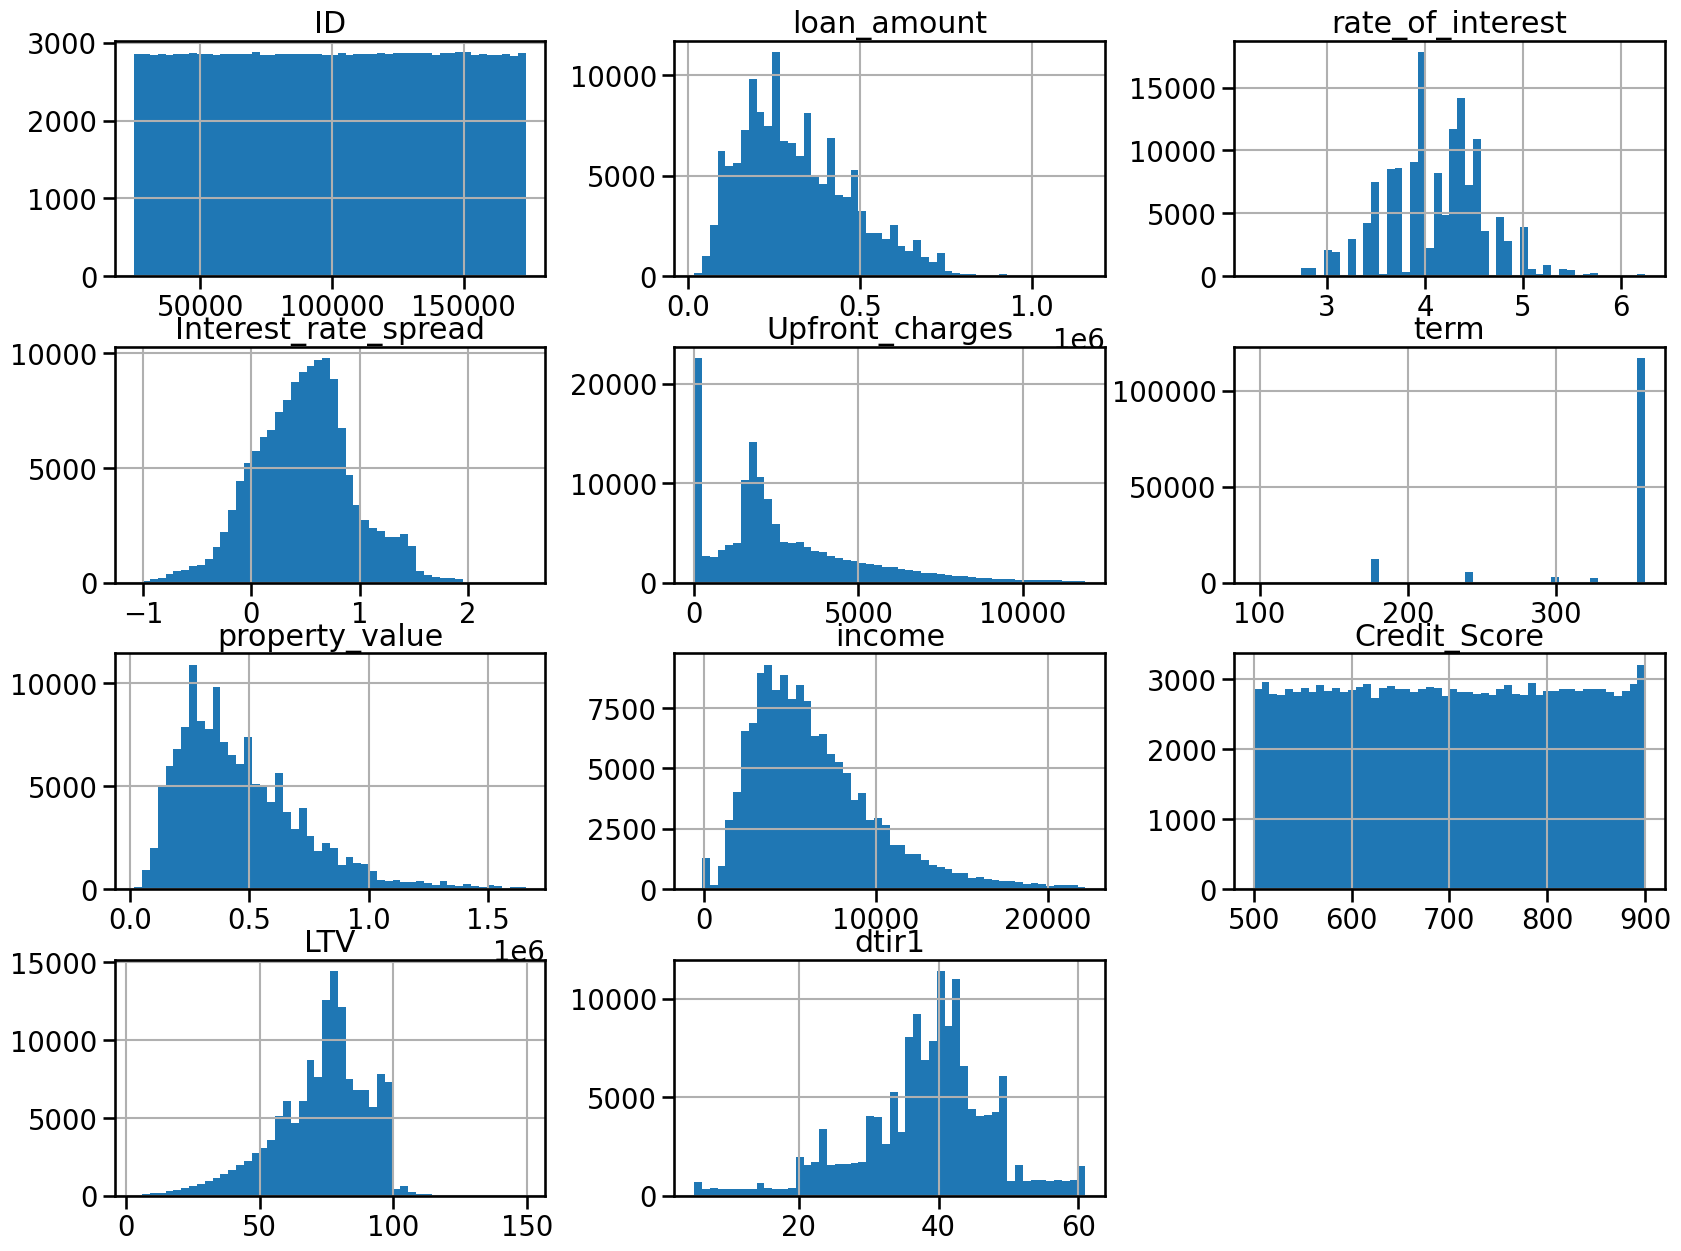

In [ ]:
df_no_outliers.hist(bins = 50, figsize = (20, 15))
plt.show()

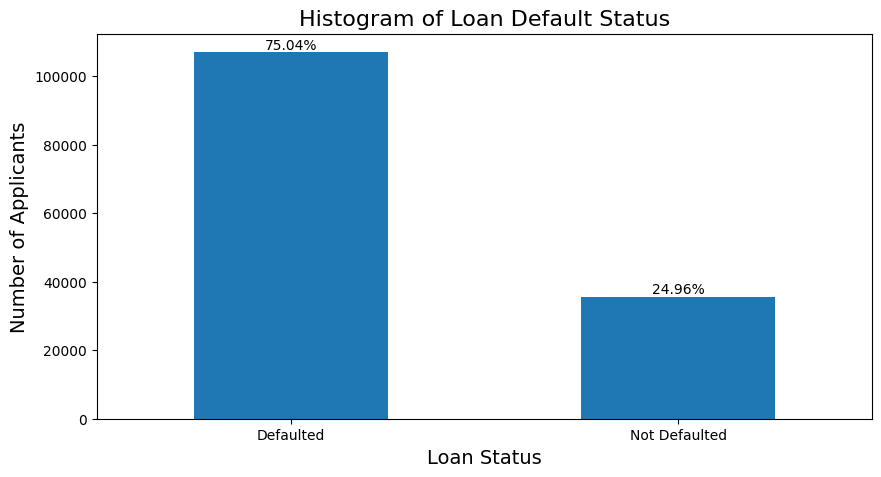

In [ ]:
# Assuming df_no_outliers['Status'].value_counts() is already calculated as status_counts
status_counts = df_no_outliers['Status'].value_counts()

# Calculate percentages
total = status_counts.sum()
percentages = (status_counts / total) * 100

with plt.style.context('default'):
    plt.figure(figsize=(10, 5))
    bars = status_counts.plot(kind='bar')
    plt.xlabel('Loan Status',fontsize=14)
    plt.ylabel('Number of Applicants',fontsize=14)
    plt.title('Histogram of Loan Default Status',fontsize=16)
    plt.xticks([0, 1], ['Defaulted', 'Not Defaulted'], rotation=0)
    plt.gca().set_facecolor('white')
    plt.grid(False)

    # Annotate bars with percentage
    for index, value in enumerate(status_counts):
        plt.text(index, value, f'{percentages[index]:.2f}%', ha='center', va='bottom')

    plt.show()  # Call plt.show() only after all plotting and annotations are done


<ipython-input-171-984e70d53e3b>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=var, y='Status', data=df_no_outliers, palette={'1.0': 'tab:blue', '0.0': 'tab:orange'})
<ipython-input-171-984e70d53e3b>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=var, y='Status', data=df_no_outliers, palette={'1.0': 'tab:blue', '0.0': 'tab:orange'})
<ipython-input-171-984e70d53e3b>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=var, y='Status', data=df_no_outliers, palette={'1.0': 'tab:blue', '0.0': 'tab:orange'})
<ipython-input-171-984e70d53

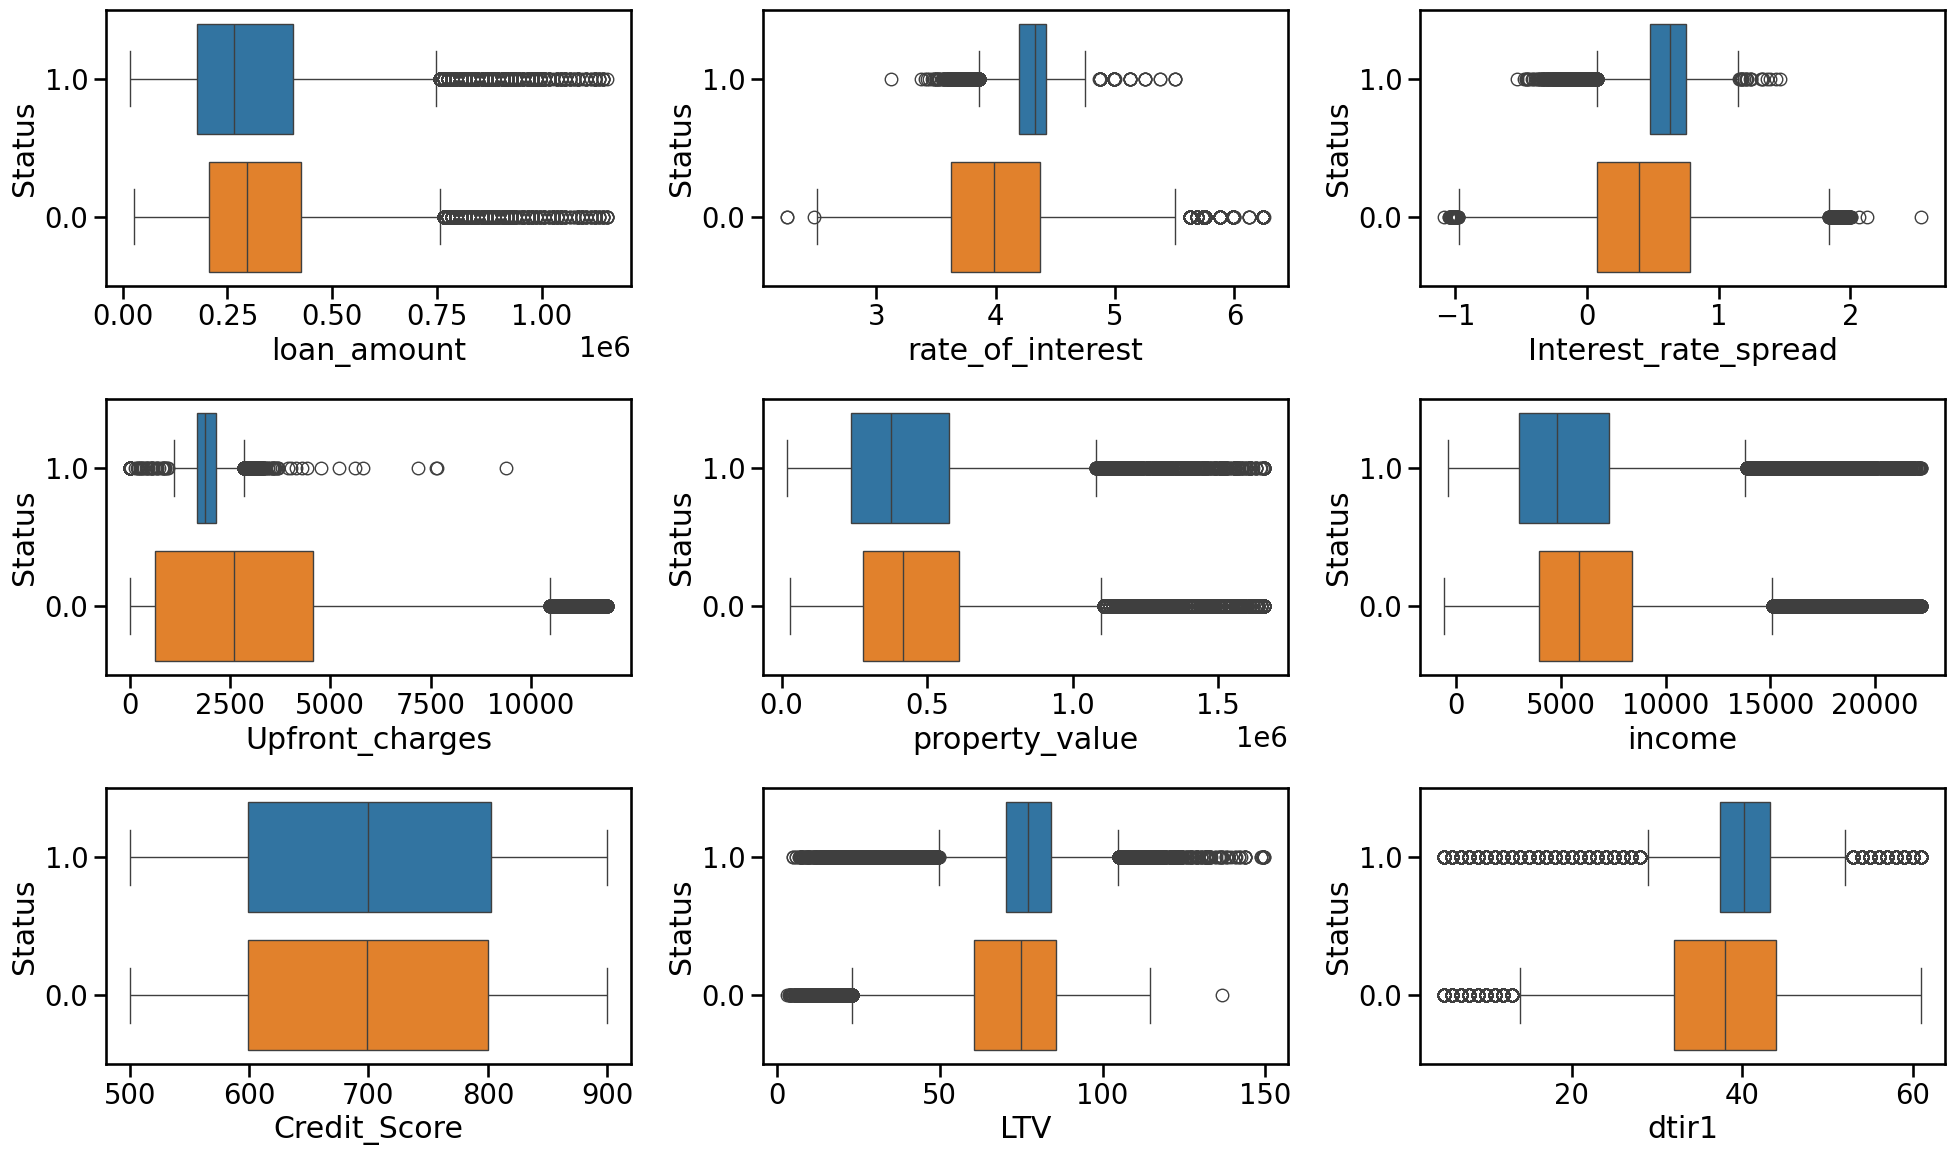

In [ ]:

# Set the context for the font scale
sns.set_context("talk", font_scale=1.2)  # 'talk' is one of the preset contexts, with a larger font scale

# Determine the types of each variable (categorical or numerical)
dtypes = pd.DataFrame(df_no_outliers.dtypes).reset_index()
cat_vars = []
num_vars = []
for i, l in zip(dtypes['index'], dtypes[0]):
    if l == 'object':
        cat_vars.append(i)
    elif i not in ['ID', 'term']:  # Exclude 'ID' and 'term' from the numerical variables
        num_vars.append(i)

# Calculate the number of rows needed for the subplots
num_rows = np.ceil(len(num_vars) / 3).astype(int)

# Increase the height of each subplot for better visibility
height_per_subplot = 5  # You can adjust this as needed


# Set up the matplotlib figure
plt.figure(figsize=(20, 4 * num_rows))

# Loop over the numerical variables and create a boxplot for each
for idx, var in enumerate(num_vars, 1):
    plt.subplot(num_rows, 3, idx)
    sns.boxplot(x=var, y='Status', data=df_no_outliers, palette={'1.0': 'tab:blue', '0.0': 'tab:orange'})
    plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-29-6660b6409da4>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=var, y='Status', data=df_no_outliers, palette = {'1.0': 'tab:blue', '0.0': 'tab:orange'})
<ipython-input-29-6660b6409da4>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=var, y='Status', data=df_no_outliers, palette = {'1.0': 'tab:blue', '0.0': 'tab:orange'})
<ipython-input-29-6660b6409da4>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=var, y='Status', data=df_no_outliers, palette = {'1.0': 'tab:blue', '0.0': 'tab:orange'})
<ipython-input-29-6660b64

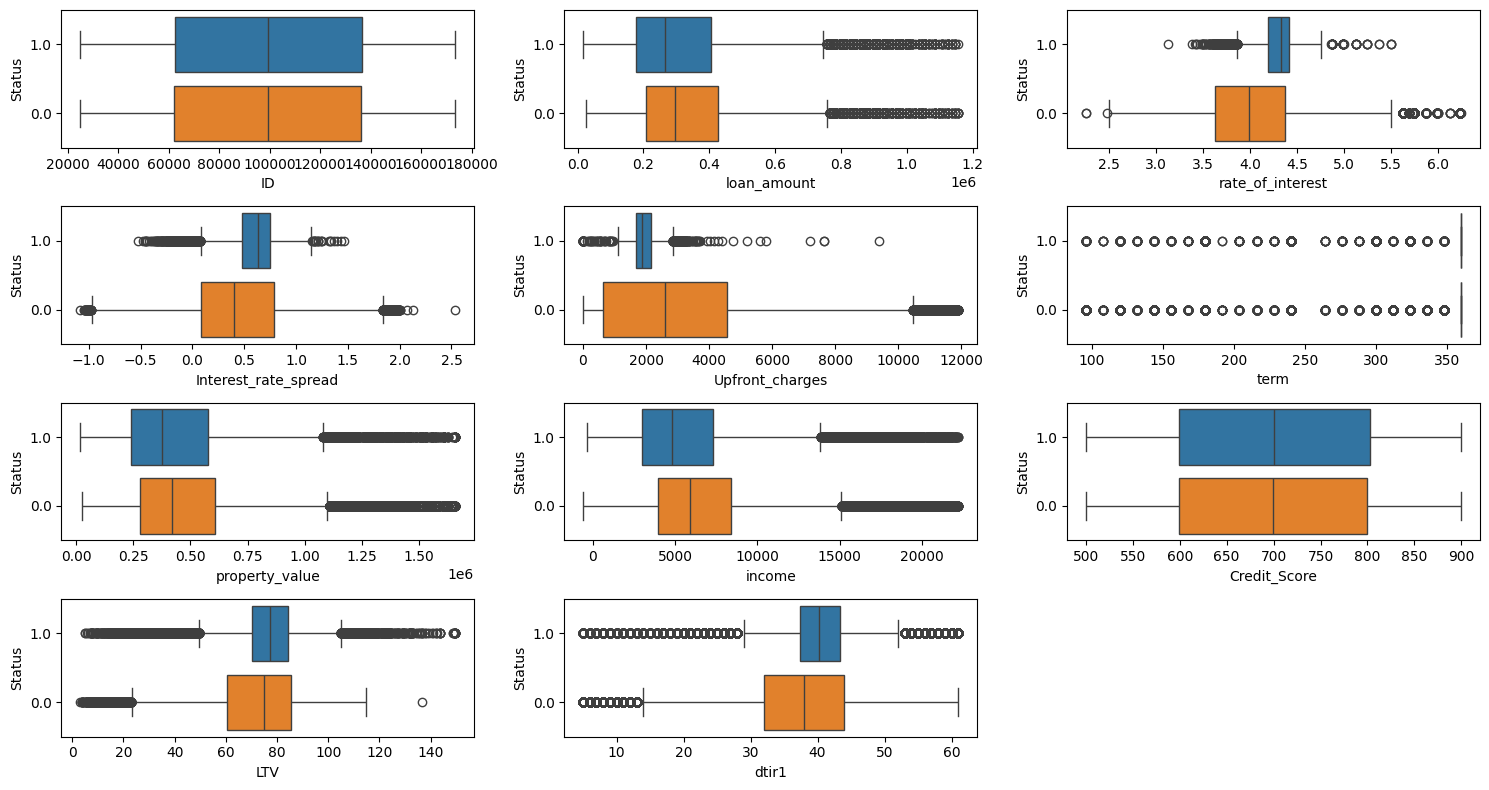

In [ ]:

## numeric vs status
dtypes = pd.DataFrame(df_no_outliers.dtypes).reset_index()
cat_vars = []
num_vars = []
for i, l in zip(dtypes['index'], dtypes[0]):
    if l == 'object':
        cat_vars.append(i)
    else:
        num_vars.append(i)

num_rows = np.ceil(len(num_vars) / 3).astype(int)

plt.figure(figsize=(15, 2 * num_rows))

for idx, var in enumerate(num_vars, 1):
    plt.subplot(num_rows, 3, idx)
    sns.boxplot(x=var, y='Status', data=df_no_outliers, palette = {'1.0': 'tab:blue', '0.0': 'tab:orange'})
    plt.tight_layout()

plt.show()

In [ ]:
df_no_outliers['Status']

0         1.0
1         1.0
2         0.0
3         0.0
4         0.0
         ... 
148665    0.0
148666    0.0
148667    0.0
148668    0.0
148669    0.0
Name: Status, Length: 142718, dtype: object

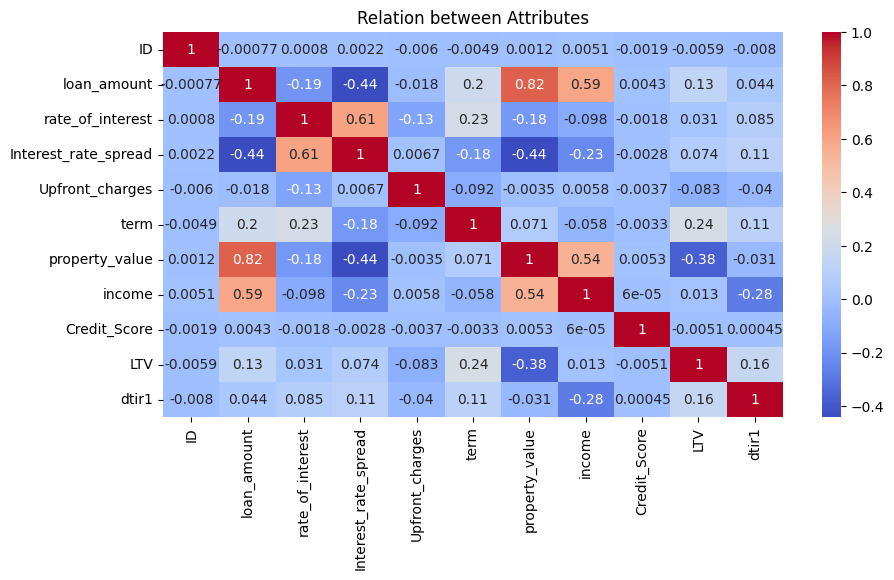

In [ ]:
##numeric corr
column_types = df_no_outliers.dtypes
numeric_columns = df_no_outliers.select_dtypes(include=[np.number])

c = numeric_columns.corr()

plt.figure(figsize=(10, 5))
sns.heatmap(c, cmap="coolwarm", annot=True)
plt.title('Relation between Attributes')
plt.show()

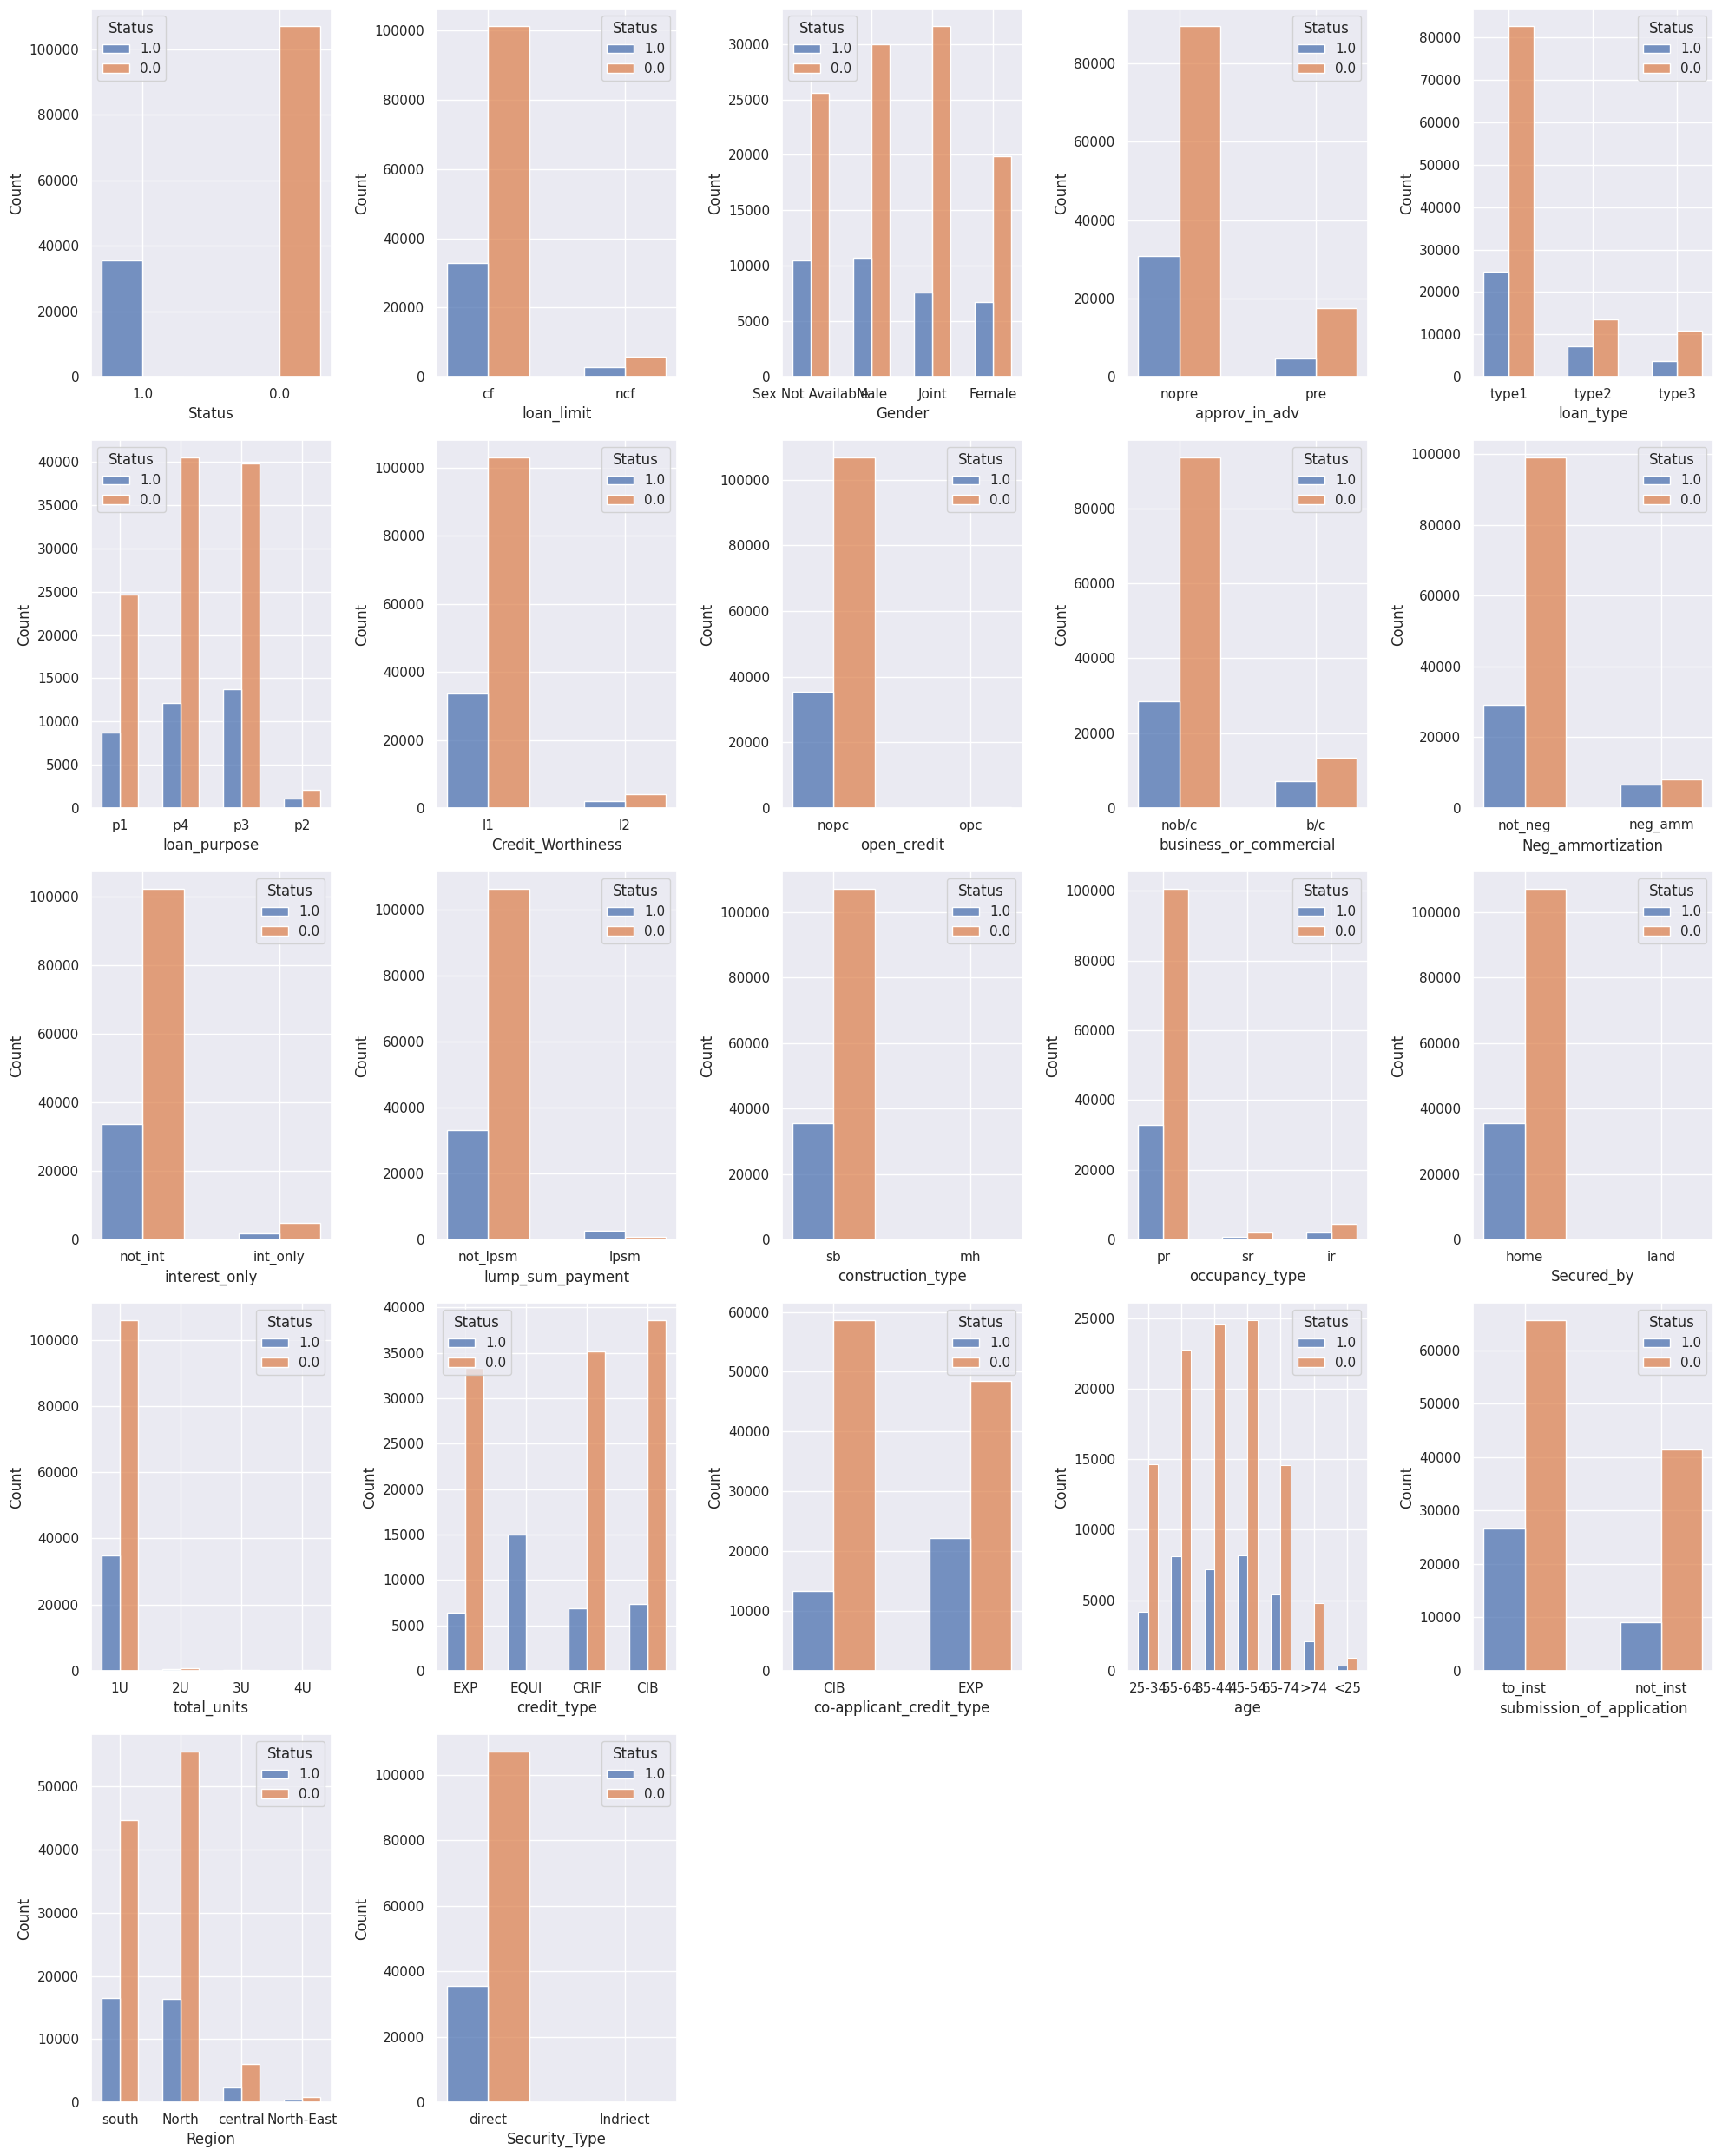

In [ ]:
# histograms of catgorical variables vs status
cat_rows = np.ceil(len(cat_vars) / 5).astype(int)

plt.figure(figsize=(20, 5 * cat_rows))

sns.set_theme(style='darkgrid')

for i, col in enumerate(cat_vars, 1):
    plt.subplot(cat_rows, 5, i)
    sns.histplot(data=df_no_outliers, x=col, hue="Status", multiple="dodge", shrink=.6, stat='count')

plt.tight_layout()
plt.show()

In [ ]:
opc = df_no_outliers[df_no_outliers['open_credit'] == 'opc']
opc['Status'].value_counts()

0.0    335
1.0     77
Name: Status, dtype: int64

In [ ]:
mh = df_no_outliers[df_no_outliers['construction_type'] == 'mh']
mh['Status'].value_counts()

1.0    32
Name: Status, dtype: int64

In [ ]:
land = df_no_outliers[df_no_outliers['Secured_by'] == 'land']
land['Status'].value_counts()

1.0    32
Name: Status, dtype: int64

In [ ]:
indirect = df_no_outliers[df_no_outliers['Security_Type'] == 'Indriect']
indirect['Status'].value_counts()

1.0    32
Name: Status, dtype: int64

In [ ]:
df_no_outliers.nunique()

ID                           142718
loan_amount                     115
rate_of_interest              35547
Interest_rate_spread          57993
Upfront_charges               93767
term                             22
property_value                14950
income                         9472
Credit_Score                    401
LTV                           21498
Status                            2
dtir1                         23817
loan_limit                        2
Gender                            4
approv_in_adv                     2
loan_type                         3
loan_purpose                      4
Credit_Worthiness                 2
open_credit                       2
business_or_commercial            2
Neg_ammortization                 2
interest_only                     2
lump_sum_payment                  2
construction_type                 2
occupancy_type                    3
Secured_by                        2
total_units                       4
credit_type                 

In [ ]:
# Encoding Categorical Variables
df_no_outliers.drop(columns=['ID'], inplace=True)

dtypes = pd.DataFrame(df_no_outliers.dtypes).reset_index()
cat_vars = []
num_vars = []
for i, l in zip(dtypes['index'], dtypes[0]):
    if l == 'object':
        cat_vars.append(i)
    else:
        num_vars.append(i)

# Binary variables
binary_vars = ['Security_Type', 'submission_of_application', 'co-applicant_credit_type', 'Secured_by',
               'lump_sum_payment', 'interest_only', 'Neg_ammortization', 'construction_type', 'business_or_commercial',
               'open_credit', 'Credit_Worthiness', 'approv_in_adv', 'loan_limit', 'Status']

In [ ]:
# Label Encoder
label = LabelEncoder()
for i in binary_vars:
    df_no_outliers[i] = label.fit_transform(df_no_outliers[i])

# OneHotEncoding
df_cat = df_no_outliers[cat_vars]
df_cat.drop(columns=binary_vars, inplace=True)

<ipython-input-38-b324c425c1ff>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat.drop(columns=binary_vars, inplace=True)


In [ ]:
cat_encoder = OneHotEncoder()
df_cat_1hot = cat_encoder.fit_transform(df_cat)
df_cat_encoded = pd.DataFrame(df_cat_1hot.toarray())

# Column names
cat_encoder.categories_
cat_columns = ['Female', 'Joint', 'Male', 'Sex Not Available',
               'type1', 'type2', 'type3',
               'p1', 'p2', 'p3', 'p4',
               'ir', 'pr', 'sr',
               'U1', 'U2', 'U3', 'U4',
               'CIB', 'CRIF', 'EQUI', 'EXP',
               'age_25-34', 'age_35-44', 'age_45-54', 'age_55-64', 'age_65-74', 'under_25', 'over_74',
               'North', 'North-East', 'central', 'south']

df_cat_encoded.columns = cat_columns
df_no_outliers.drop(columns=df_cat.columns, inplace=True)

# Concat
df = pd.concat([df_no_outliers, df_cat_encoded], axis=1, join='inner')

In [ ]:
# train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
y_train = train_set['Status']
X_train = train_set.drop(columns=['Status'])
y_test = test_set['Status']
X_test = test_set.drop(columns=['Status'])

In [ ]:
# use machine learning classification techniques
# comparing the performance of different algorithms



>Logistic

In [ ]:
# ====================================================================
# logistic regression: 0.40 F1-score on test set
# ====================================================================
lr_pipeline = make_pipeline(StandardScaler(), LogisticRegression())

scoring_metrics = ['f1', 'roc_auc', 'accuracy']
lr_scores = {}

# Loop metric & perform 5-fold cross-validation and print results
for metric in scoring_metrics:
    cv_scores = cross_val_score(lr_pipeline, X_train, y_train, cv=5, scoring=metric)
    lr_scores[metric] = cv_scores
    print(f"{metric.capitalize()} Score: {cv_scores.mean():0.2f} (+/- {cv_scores.std() * 2:0.2f})")


F1 Score: 0.40 (+/- 0.02)
Roc_auc Score: 0.81 (+/- 0.01)
Accuracy Score: 0.77 (+/- 0.01)


In [ ]:
# Making predictions on the test set
lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

accur_lr_test = accuracy_score(y_test, y_pred_lr)
roc_auc_lr_test = roc_auc_score(y_test, y_pred_lr)
f1_score_lr_test = f1_score(y_test, y_pred_lr)

# Evaluate and print the performance on the test set
lr_scores_test = {
    'f1': f1_score(y_test, y_pred_lr),
    'roc_auc': roc_auc_score(y_test, y_pred_lr),
    'accuracy': accuracy_score(y_test, y_pred_lr)
    }

for metric, score in lr_scores_test.items():
    print(f"{metric.capitalize()} Test Score: {score:0.2f}")

F1 Test Score: 0.40
Roc_auc Test Score: 0.62
Accuracy Test Score: 0.77


> XGBoost

In [ ]:
# ====================================================================
# XGBoost Classifier: 0.9733 F1-score on test set
# ====================================================================

# xgbclassifier
xgbc = XGBClassifier(eval_metric='logloss')

# Scores on train set
scores = cross_val_score(xgbc, X_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

xgb_scores = {}

# Loop metric & perform 5-fold cross-validation and print results
for metric in scoring_metrics:
    cv_scores = cross_val_score(xgbc, X_train, y_train, cv=5, scoring=metric)
    xgb_scores[metric] = cv_scores
    print(f"{metric.capitalize()} Score: {cv_scores.mean():0.3f} (+/- {cv_scores.std() * 2:0.3f})")


Mean cross-validation score: 1.00
F1 Score: 0.997 (+/- 0.001)
Roc_auc Score: 1.000 (+/- 0.000)
Accuracy Score: 0.999 (+/- 0.001)


In [ ]:
# Fit the model to the training data
xgbc.fit(X_train, y_train)

# Predict on the test data
y_pred_xgb = xgbc.predict(X_test)

accur_xbg_test = accuracy_score(y_test, y_pred_xgb)
roc_auc_xbg_test = roc_auc_score(y_test, y_pred_xgb)
f1_score_xbg_test = f1_score(y_test, y_pred_xgb)

# Evaluate and print the performance on the test set
xgb_scores_test = {
    'f1': f1_score(y_test, y_pred_xgb),
    'roc_auc': roc_auc_score(y_test, y_pred_xgb),
    'accuracy': accuracy_score(y_test, y_pred_xgb)
    }

for metric, score in xgb_scores_test.items():
    print(f"{metric.capitalize()} Test Score: {score:0.3f}")

F1 Test Score: 0.997
Roc_auc Test Score: 0.999
Accuracy Test Score: 0.999


> Random Forest

In [ ]:
# ====================================================================
# Random Forest Classifier:  F1-score on test set
# ====================================================================

# optimaized param_grid via RandomizedSearchCV
param_grid = {
    'n_estimators': 500,  # The number of trees
    'max_features': 0.33, #  The number of features to consider
    'max_depth': 50,  # The maximum depth of the tree
    'min_samples_split': 50,  # The minimum number of samples required to split an internal node
    'min_samples_leaf': 1  # The minimum number of samples required to be at a leaf node.
}

# RF classifier with tuned hyperparameters
rf = RandomForestClassifier(**param_grid, random_state=42)


####### Scores on training set
#rf_scores = cross_val_score(rf, X_train, y_train, cv=5) # default metric is accuracy
#print("Mean cross-validation score: %.5f" % rf_scores.mean())

rf_cv_scores = {}

scoring_metrics = ['f1', 'roc_auc', 'accuracy']

# Loop metric & perform 5-fold cross-validation on training data set and print results
for metric in scoring_metrics:
    cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring=metric)
    rf_cv_scores[metric] = cv_scores
    print(f"{metric.capitalize()} Score: {cv_scores.mean():0.5f} (+/- {cv_scores.std() * 2:0.5f})")


F1 Score: 0.99316 (+/- 0.00230)
Roc_auc Score: 0.99986 (+/- 0.00005)
Accuracy Score: 0.99660 (+/- 0.00113)


In [ ]:
start = time.time()

# Fit the model
rf.fit(X_train, y_train)

# predict y_test
y_pred_rf = rf.predict(X_test)


# Evaluate and print the performance on the test set
rf_scores_test = {
    'f1': f1_score(y_test, y_pred_rf),
    'roc_auc': roc_auc_score(y_test, y_pred_rf),
    'accuracy': accuracy_score(y_test, y_pred_rf)
    }

for metric, score in rf_scores_test.items():
    print(f"{metric.capitalize()} Test Score: {score:0.5f}")

duration = time.time() - start
print('Running time: {}s'.format(duration))

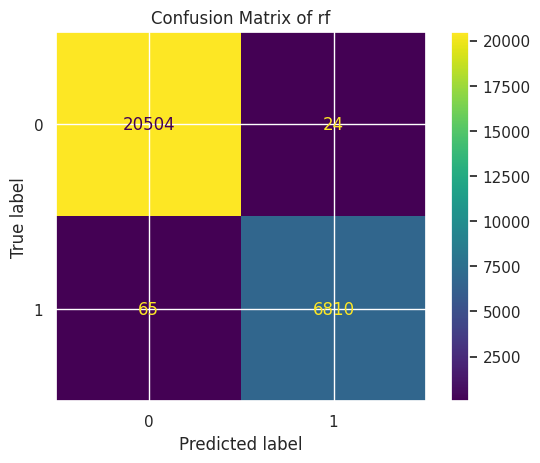

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_rf)
# Confusion Matrix of the classification
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=rf.classes_)
disp.plot()
plt.title('Confusion Matrix of rf')
plt.show()

In [ ]:
# ====================================================================
# Naive Bayes Classifier: 0.780 F1-score on test set
# ====================================================================

# Gaussian Naive Bayes Classifier
naive_bayes = GaussianNB()

nb_scores = {}
scoring_metrics = ['f1', 'roc_auc', 'accuracy']

# Loop metric & perform 5-fold cross-validation and print results
for metric in scoring_metrics:
    cv_scores = cross_val_score(naive_bayes, X_train, y_train, cv=5, scoring=metric)
    nb_scores[metric] = cv_scores
    print(f"{metric.capitalize()} Score: {cv_scores.mean():0.3f} (+/- {cv_scores.std() * 2:0.3f})")

In [ ]:
naive_bayes.fit(X_train, y_train)
nb_preds = naive_bayes.predict(X_test)

nb_scores_test = {
    'f1': f1_score(y_test, nb_preds),
    'roc_auc': roc_auc_score(y_test, nb_preds),
    'accuracy': accuracy_score(y_test, nb_preds)
    }

for metric, score in nb_scores_test.items():
    print(f"{metric.capitalize()} Test Score: {score:0.3f}")